![](http://sigdelta.com/assets/images/sages-sd-logo.png)

# Analiza danych i uczenie maszynowe w Python

Autor notebooka: Jakub Nowacki.

## Regresja liniowa

[Regresja liniowa](https://en.wikipedia.org/wiki/Linear_regression) jest jedną z podstawowych, niemniej nadal często wykorzystywanych rodzajów regresji. Przećwiczymy ją na przykładowym zbiorze danych związanych z cukrzycą. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

# Zbiór danych
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [2]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [3]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [4]:
diabetes.data.shape

(442, 10)

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Dla lepszej jasności przykładu użyjmy jednego atrybutu do przeprowadzenia regresji.

In [7]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Dzielimy dane na zbiory treningowy i testowy
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [8]:
diabetes_X_train[:5], diabetes_y_train[:5]

(array([[ 0.06169621],
        [-0.05147406],
        [ 0.04445121],
        [-0.01159501],
        [-0.03638469]]), array([151.,  75., 141., 206., 135.]))

In [9]:
# Tworzymy obiekt modelu i go uczymy
regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Teraz możemy sprawdzić czy model dobrze się uczy i jak przewiduje na danych testowych.

In [10]:
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

Możemy przeprowadzić teraz ocenę jakości modelu.

In [11]:
print('Współczynniki: \n', regr.coef_)
print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Metryka R2 (wariancji): %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Współczynniki: 
 [938.23786125]
Błąd średniokwadratowy: 2548.07
Metryka R2 (wariancji): 0.47


Narysujmy też predykcje naszego modelu na wykresie.

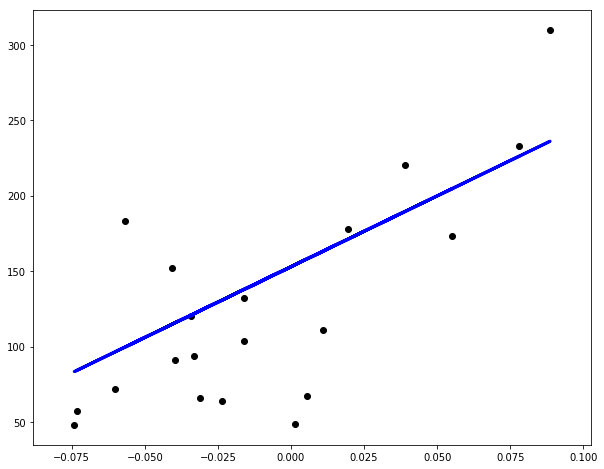

In [12]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()

## Zadanie

1. Użyj więcej zmiennych do uczenia modelu; porównaj wyniki pomiaru jakości regresji.
1. Narysuj linię regresji w stosunku do innych zmiennych.
1. ★ Jakie cechy wpływają na najbardziej na wynik? Jak to sprawdzić?

Współczynniki: 
 [  68.63539827 -258.4530532   621.06953337  436.48045673 -440.97061493]
Błąd średniokwadratowy: 2620.68
Metryka R2 (wariancji): 0.46


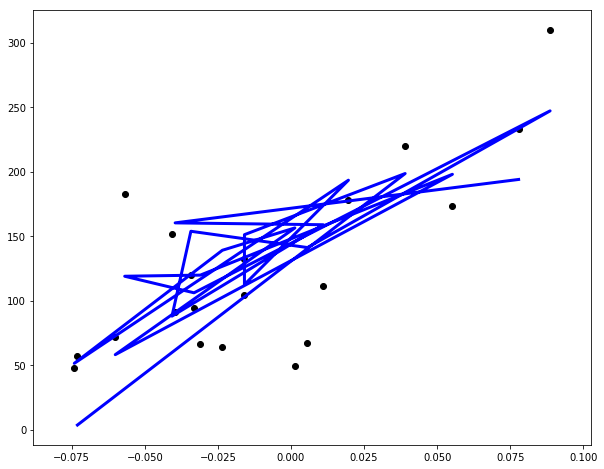

In [31]:
diabetes_X = diabetes.data[:, [0,1,2,3,6]]

# Dzielimy dane na zbiory treningowy i testowy
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_X_test)

print('Współczynniki: \n', regr.coef_)
print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Metryka R2 (wariancji): %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

plt.scatter(diabetes_X_test[:,2], diabetes_y_test,  color='black')
plt.plot(diabetes_X_test[:,2], diabetes_y_pred, color='blue', linewidth=3)
plt.show()

## Pandas

Spróbujmy powrócić do Pandas i wykonać ten sam model. 

In [32]:
import pandas as pd

dia_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)\
    .assign(target=diabetes.target)
    
dia_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [33]:
dia_train = dia_df.iloc[:-20, :]
dia_train.head(20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [34]:
dia_test = dia_df.iloc[-20:, :]
dia_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,233.0
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,91.0
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,111.0
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,152.0
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,120.0
427,-0.034575,0.050680,0.005650,-0.005671,-0.073119,-0.062691,-0.006584,-0.039493,-0.045421,0.032059,67.0
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066048,0.131470,310.0
429,-0.041840,-0.044642,-0.033151,-0.022885,0.046589,0.041587,0.056003,-0.024733,-0.025952,-0.038357,94.0
430,-0.009147,-0.044642,-0.056863,-0.050428,0.021822,0.045345,-0.028674,0.034309,-0.009919,-0.017646,183.0
431,0.070769,0.050680,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014956,-0.001078,66.0


In [35]:
lr = linear_model.LinearRegression()
lr.fit(dia_train[['age', 'sex', 'bmi']], dia_train['target'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
dia_test = dia_test.assign(predict=lambda x: lr.predict(x[['age', 'sex', 'bmi']]))
dia_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,predict
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,233.0,211.071181
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,91.0,116.261552
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,111.0,161.517691
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,152.0,105.886702
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,120.0,124.331705
427,-0.034575,0.050680,0.005650,-0.005671,-0.073119,-0.062691,-0.006584,-0.039493,-0.045421,0.032059,67.0,151.351420
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066048,0.131470,310.0,239.264161
429,-0.041840,-0.044642,-0.033151,-0.022885,0.046589,0.041587,0.056003,-0.024733,-0.025952,-0.038357,94.0,118.023364
430,-0.009147,-0.044642,-0.056863,-0.050428,0.021822,0.045345,-0.028674,0.034309,-0.009919,-0.017646,183.0,101.065322
431,0.070769,0.050680,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014956,-0.001078,66.0,133.051614


In [37]:
print('Współczynniki: \n', lr.coef_)
print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(dia_test['target'], lr.predict(dia_test[['age', 'sex', 'bmi']])))
print('Metryka R2 (wariancji): %.2f' % r2_score(dia_test['target'], dia_test['predict']))

Współczynniki: 
 [144.25978848 -33.43463042 914.07000914]
Błąd średniokwadratowy: 2585.66
Metryka R2 (wariancji): 0.46


## Zadanie

1. Podobnie jak powyżej, poeksperymentuj z cechami.
1. Zautomatyzuj powyższy eksperyment.
1. ★ Czy są jeszcze jakieś parametry które można dostosować?

In [44]:
def tworzmodel(df,zmienne,target_col='target'):
    df_train = df.iloc[:-20, :]
    df_test = df.iloc[:-20, :]
    lr = linear_model.LinearRegression()
    lr.fit(df_train[zmienne], df_train[target_col])
    pred = lr.predict(df_test[zmienne])
    print('Współczynniki: \n', lr.coef_)
    print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(df_test[target_col], pred))
    print('Metryka R2 (wariancji): %.2f' % r2_score(df_test[target_col], pred))
    return lr

tworzmodel(dia_df,['age', 'sex', 'bmi'])

Współczynniki: 
 [144.25978848 -33.43463042 914.07000914]
Błąd średniokwadratowy: 3909.79
Metryka R2 (wariancji): 0.34


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
np.newaxis

## Regresja liniowa z regularyzacją

Aby wybrać odpowiedni model, który odpowiednio generalizuje, używa się technik [regularyzacji](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29). Dwie najbardziej znane techniki to [Lasso, czyli regularyzacja L1](https://en.wikipedia.org/wiki/Lasso_%28statistics%29), oraz [Ridge, czyli regularyzacja L2](https://en.wikipedia.org/wiki/Tikhonov_regularization). Poniżej przykłady wykorzystania tych algorytmów.

In [45]:
ridge = linear_model.Ridge()
ridge.fit(dia_train[['age', 'sex', 'bmi']], dia_train['target'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
dia_test = dia_test.assign(predict=lambda x: ridge.predict(x[['age', 'sex', 'bmi']]))
dia_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,predict
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,233.0,179.626754
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,91.0,136.525047
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,111.0,158.441800
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,152.0,126.104300
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,120.0,141.335891
427,-0.034575,0.050680,0.005650,-0.005671,-0.073119,-0.062691,-0.006584,-0.039493,-0.045421,0.032059,67.0,152.034710
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066048,0.131470,310.0,198.426854
429,-0.041840,-0.044642,-0.033151,-0.022885,0.046589,0.041587,0.056003,-0.024733,-0.025952,-0.038357,94.0,133.477980
430,-0.009147,-0.044642,-0.056863,-0.050428,0.021822,0.045345,-0.028674,0.034309,-0.009919,-0.017646,183.0,126.437037
431,0.070769,0.050680,-0.030996,0.021872,-0.037344,-0.047034,0.033914,-0.039493,-0.014956,-0.001078,66.0,147.175451


In [47]:
print('Współczynniki: \n', ridge.coef_)
print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(dia_test['target'], ridge.predict(dia_test[['age', 'sex', 'bmi']])))
print('Metryka R2 (wariancji): %.2f' % r2_score(dia_test['target'], dia_test['predict']))

Współczynniki: 
 [109.85742979   3.77646864 448.40398428]
Błąd średniokwadratowy: 3602.78
Metryka R2 (wariancji): 0.25


In [48]:
lasso = linear_model.Lasso()
lasso.fit(dia_train[['age', 'sex', 'bmi']], dia_train['target'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
dia_test = dia_test.assign(predict=lambda x: lasso.predict(x[['age', 'sex', 'bmi']]))
dia_test

In [ ]:
print('Współczynniki: \n', lasso.coef_)
print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(dia_test['target'], lasso.predict(dia_test[['age', 'sex', 'bmi']])))
print('Metryka R2 (wariancji): %.2f' % r2_score(dia_test['target'], dia_test['predict']))

Jak widać parametry wypadły gorzej niż dla zwykłej regresji liniowej. Wynika to z faktu, że regularyzacje mają hipetparametry, które należy dostosować do problemy. Do tego zostały stworzone wersje z wbudowaną walidacją krzyżową ([Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29), która również dobiera hiperparametry.

In [ ]:
lasso = linear_model.LassoCV(cv=5)
lasso.fit(dia_train[['age', 'sex', 'bmi']], dia_train['target'])

In [ ]:
dia_test = dia_test.assign(predict=lambda x: lasso.predict(x[['age', 'sex', 'bmi']]))
dia_test

In [ ]:
print('Współczynniki: \n', lasso.coef_)
print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(dia_test['target'], lasso.predict(dia_test[['age', 'sex', 'bmi']])))
print('Metryka R2 (wariancji): %.2f' % r2_score(dia_test['target'], dia_test['predict']))

Zobaczmy co dzieje się w trakcie procesu walidacji krzyżowej. Algorytm liczy dla każdego podziału danych krzywą MSE w zależności od parametru alpha, jak pokazano poniżej.

In [ ]:
plt.plot(-pd.np.log10(lasso.alphas_), lasso.mse_path_, linestyle='--');
plt.plot(-pd.np.log10(lasso.alphas_), lasso.mse_path_.mean(axis=1), 'k', linewidth=3);

plt.xlabel('$-log_{10}(alpha)$');
plt.ylabel('Mean Square Error (MSE)');

## Zadanie

1. Spróbuj inne kolumny z LassoCV.
1. Spróbuj różne parametry modelu.
1. Spróbuj użyć RidgeCV.

In [57]:
def tworzmodellasso(df,zmienne,target_col='target',cv_par=5):
    df_train = df.iloc[:-20, :]
    df_test = df.iloc[:-20, :]
    lr = linear_model.LassoCV(cv=cv_par,alphas=np.linspace(0.01,1,100))
    lr.fit(df_train[zmienne], df_train[target_col])
    pred = lr.predict(df_test[zmienne])
    print('Współczynniki: \n', lr.coef_)
    print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(df_test[target_col], pred))
    print('Metryka R2 (wariancji): %.2f' % r2_score(df_test[target_col], pred))
    return lr

tworzmodellasso(dia_df,['age', 'sex', 'bmi','bp'],cv_par=3)

Współczynniki: 
 [  0.         -17.52617683 736.27357198 369.46123137]
Błąd średniokwadratowy: 3635.68
Metryka R2 (wariancji): 0.39


LassoCV(alphas=array([0.01, 0.02, ..., 0.99, 1.  ]), copy_X=True, cv=3,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [53]:
def tworzmodelridge(df,zmienne,target_col='target'):
    df_train = df.iloc[:-20, :]
    df_test = df.iloc[:-20, :]
    lr = linear_model.Ridge()
    lr.fit(df_train[zmienne], df_train[target_col])
    pred = lr.predict(df_test[zmienne])
    print('Współczynniki: \n', lr.coef_)
    print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(df_test[target_col], pred))
    print('Metryka R2 (wariancji): %.2f' % r2_score(df_test[target_col], pred))
    return lr

tworzmodelridge(dia_df,['age', 'sex', 'bmi'])

Współczynniki: 
 [109.85742979   3.77646864 448.40398428]
Błąd średniokwadratowy: 4413.22
Metryka R2 (wariancji): 0.26


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)